In [1]:
# ---------------------------- #
#     Fix import structure     #
# ---------------------------- #
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
module_path = os.path.abspath('../../..')
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from examples.RTP.env import RTP
from examples.RTP.main import run_game, create_models

# ---------------------------- #
#    Run game test with viz    #
# ---------------------------- #

parameters = {
    'world_size': 25, # Size of the environment
    'num_models': 1, # Number of agents. Right now, only supports 1
    'sync_freq': 200, # Parameters related to model soft update. TODO: Figure out if these are still needed
    'model_update_freq': 4, # Parameters related to model soft update. TODO: Figure out if these are still needed 
    'epsilon': 0.5, # Exploration parameter
    'conditions': ['EWA', 'None'], # Model run conditions
    'epsilon_decay': 0.9999, # Exploration decay rate
    'episodic_decay_rate': 1.0, # EWA episodic decay rate
    'similarity_decay_rate': 1.0,
    'epochs': 200, # Number of epochs
    'max_turns': 20, # Number of turns per game
    'object_memory_size': 12000, # Size of the memory buffer
    'knn_size': 5, # Size of the nearest neighbours
    'RUN_PROFILING': False, # Whether to time each epoch
    'log': False, # Tensorboard support. Currently disabled
    'contextual': True # Whether the agents' need changes based on its current resource value or stays static
}

# Initialize environment
env = RTP(
    height=parameters['world_size'],
    width=parameters['world_size'],
    layers=1,
    contextual=parameters['contextual']
)

# Run model with all of the conditions
for condition in range(len(parameters['conditions'])):
    # Create new models
    all_models = create_models(
        num_models = 1,
        device = 'cpu',
        episodic_decay_rate = parameters['episodic_decay_rate'],
        similarity_decay_rate = parameters['similarity_decay_rate']
    )

    all_models, env, turn, epsilon = run_game(
        all_models = all_models,
        env = env,
        condition = parameters['conditions'][condition],
        parameters = parameters
        )

Fixing import structure...
20 21 -21 [1, 1, 31] 63.18052887171507 0.49895104933529927 0 EWA
40 21 -1 [1, 2, 11] 73.76368036866188 0.49795409467505997 0 EWA
60 21 1 [1, 3, 9] 77.81131875142455 0.4969591320310634 0 EWA
80 21 7 [1, 4, 3] 93.7785490527749 0.4959661574230596 0 EWA
100 21 -1 [0, 3, 1] 86.6810362264514 0.4949751668787515 0 EWA
120 21 26 [3, 2, 4] 93.8666274137795 0.4939861564337792 0 EWA
140 21 7 [1, 3, 3] 109.28589302301407 0.492999122131704 0 EWA
160 21 10 [2, 3, 10] 108.58195705711842 0.49201406002399256 0 EWA
180 21 -9 [0, 0, 9] 53.39618517458439 0.491030966170001 0 EWA
20 21 -47 [0, 3, 47] 20.81485767662525 0.49895104933529927 0 None
40 21 -22 [0, 1, 22] 21.0897404178977 0.49795409467505997 0 None
60 21 23 [3, 5, 7] 53.610422160476446 0.4969591320310634 0 None
80 21 -5 [0, 2, 5] 113.73800137639046 0.4959661574230596 0 None
100 21 17 [2, 4, 3] 132.58204170316458 0.4949751668787515 0 None
120 21 -7 [0, 2, 7] 66.15830913186073 0.4939861564337792 0 None
140 21 -2 [0, 0, 2] 4

Took action: up. Received 0.


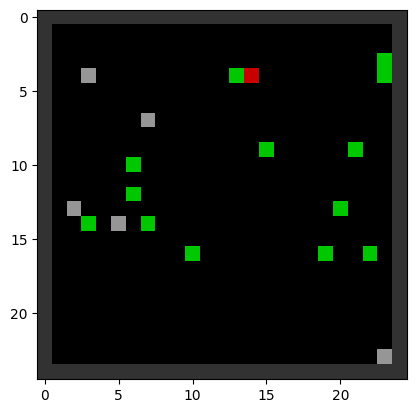

Game over. Received 0 total reward.


In [4]:
from examples.RTP.utils import run_one_game

run_one_game(
    all_models,
    condition='EWA',
    env=env,
    max_turns=20,
    save = True
)